In [41]:
import yfinance as yf
# Download stock price data for Apple Inc.
df = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
df.to_csv('AAPL.csv')

[*********************100%***********************]  1 of 1 completed


In [42]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [43]:
forecast_days = 30
df = df[['Close']]
df['Prediction'] = df[['Close']].shift(-forecast_days)

C:\Users\westo\AppData\Local\Temp\ipykernel_5164\2529829016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-forecast_days)


In [44]:
X = np.array(df.drop(['Prediction'], 1))
X = X[:-forecast_days]
y = np.array(df['Prediction'])
y = y[:-forecast_days]

split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train, y_train)

C:\Users\westo\AppData\Local\Temp\ipykernel_5164\3904763005.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))


SVR(C=1000.0, gamma=0.1)

In [45]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: -0.9299233846019421


C:\Users\westo\AppData\Local\Temp\ipykernel_5164\172454436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
C:\Users\westo\AppData\Local\Temp\ipykernel_5164\172454436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
C:\Users\westo\AppData\Local\Temp\ipykernel_5164\172454436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

C:\Users\westo\AppData\Local\Temp\ipykernel_5164\172454436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
C:\Users\westo\AppData\Local\Temp\ipykernel_5164\172454436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
C:\Users\westo\AppData\Local\Temp\ipykernel_5164\172454436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

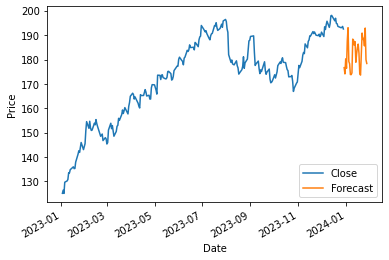

In [46]:
forecast_set = model.predict(X[-forecast_days:])
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = pd.Timestamp(next_unix, unit='s')
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()